![alt text](sparks.png "Title")
# Graduate Rotational Internship Program 
# TASK-3

## To explore Unsupervised Machine Learning

### K-Means Clustering

From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

## 1.Importing the Libraries

In [1]:
import pandas as pd             #for data manipulation
import numpy as np              #for calculations
import matplotlib.pyplot as plt #for visualization

## 2.Importing and Exploring the Dataset

In [2]:
df = pd.read_csv("Iris.csv")
print('Number of rows and columns is the dataset is:',df.shape)
df.head(10)

Number of rows and columns is the dataset is: (150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


#### Understanding the Dataset
   The dataset consist of 5 columns: Id, Sepal length, Sepal Width, Petal length, Petal Width and Species the flower belong to. Since it's clustering model we are not worried about the Species column, we have to segment the flowers based on the 4 attributes. 

## 3.Visualizing the Dataset

Text(0.5, 1.0, 'Sepal Length Vs Sepal Width')

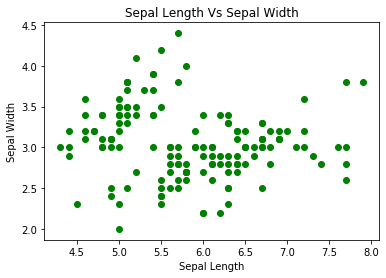

In [5]:
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'],color='green')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length Vs Sepal Width')

Text(0.5, 1.0, 'Petal Length Vs Petal Width')

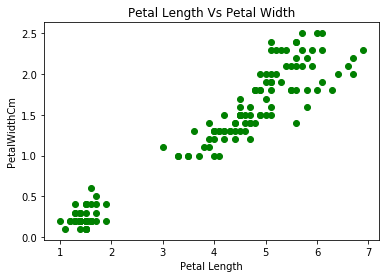

In [6]:
plt.scatter(df['PetalLengthCm'],df['PetalWidthCm'],color='green')
plt.xlabel('Petal Length')
plt.ylabel('PetalWidthCm')
plt.title('Petal Length Vs Petal Width')

Applying Linear Encoder to the Species column to convert species column to numbers for visualizing it as clusters:

In [7]:
from sklearn.preprocessing import LabelEncoder 
lb = LabelEncoder()
y = lb.fit_transform(df.loc[:,'Species'])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Text(0, 0.5, 'Sepal Width')

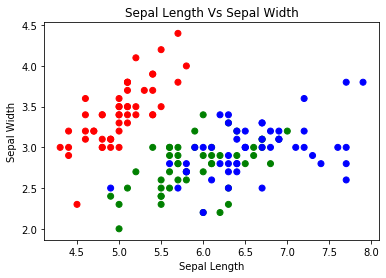

In [8]:
colormap = np.array(['Red','green','blue'])
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'],c=colormap[y])
plt.title('Sepal Length Vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

Text(0.5, 0, 'Petal Width')

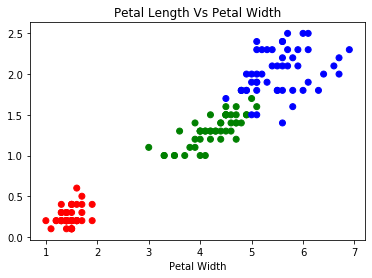

In [9]:
plt.scatter(df['PetalLengthCm'], df['PetalWidthCm'],c=colormap[y])
plt.title('Petal Length Vs Petal Width')
plt.xlabel('Petal Length')
plt.xlabel('Petal Width')

## 4.Data Preprocessing and Modelling

In [10]:
X = df.iloc[:,[1,2,3,4]].values
X[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

#### Importing the KMeans Clustering algorithm 

In [11]:
from sklearn.cluster import KMeans

wcss = [] # Within cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

print("Within Cluster Sum of Squares:",wcss)

Within Cluster Sum of Squares: [680.8244, 152.36870647733906, 78.94084142614602, 57.345409315718165, 46.53558205128205, 38.93873974358974, 34.19068792479662, 29.905374299825105, 27.927882157034972, 25.95549708624709]


To find the optimal number of clusters-use the Elbow Method based on the WCSS

Text(0, 0.5, 'WCSS')

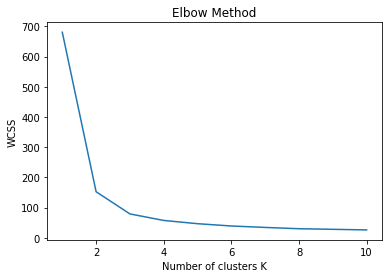

In [12]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters K')
plt.ylabel('WCSS')

The otpimal number of clusters with least WCSS is 3 

In [13]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_pred = kmeans.fit_predict(X)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [14]:
df['cluster'] = y_pred
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


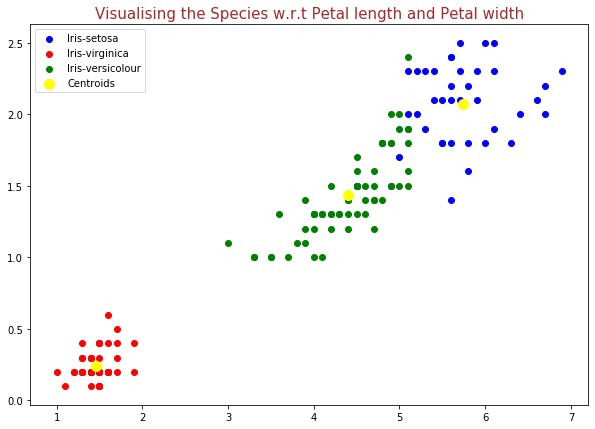

In [17]:
df1 = df[df['cluster']==0]
df2 = df[df['cluster']==1]
df3 = df[df['cluster']==2]
plt.figure(figsize=(10,7))
plt.scatter(df1['PetalLengthCm'], df1['PetalWidthCm'],color='blue',label = 'Iris-setosa')
plt.scatter(df2['PetalLengthCm'], df2['PetalWidthCm'],color='red',label='Iris-virginica')
plt.scatter(df3['PetalLengthCm'], df3['PetalWidthCm'],color='green',label = 'Iris-versicolour')
plt.scatter(kmeans.cluster_centers_[:, 2],kmeans.cluster_centers_[:,3],marker='o',color='yellow',label = 'Centroids',s=100)
plt.title('Visualising the Species w.r.t Petal length and Petal width',color='brown',fontsize=15)
plt.legend()

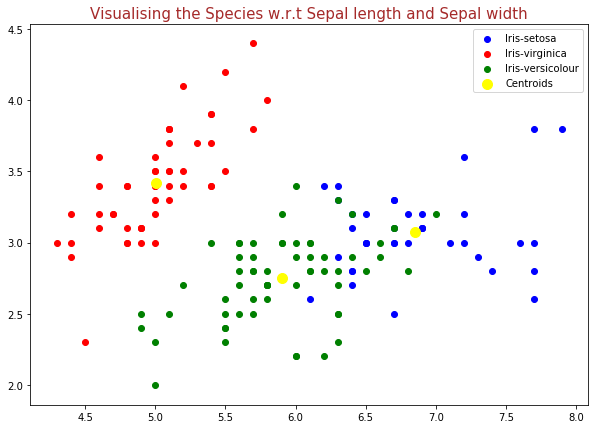

In [18]:
plt.figure(figsize=(10,7))
plt.scatter(df1['SepalLengthCm'], df1['SepalWidthCm'],color='blue',label = 'Iris-setosa')
plt.scatter(df2['SepalLengthCm'], df2['SepalWidthCm'],color='red',label='Iris-virginica')
plt.scatter(df3['SepalLengthCm'], df3['SepalWidthCm'],color='green',label = 'Iris-versicolour')
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:,1],marker='o',color='yellow',label = 'Centroids',s=100)
plt.title('Visualising the Species w.r.t Sepal length and Sepal width', color='brown',fontsize=15)
plt.legend()